# Collecting the Data

In [ ]:
We first specify the URL of a Wikipedia page containing a table of European cities ranked by population within city limits.
We then use the requests library to send an HTTP request to the URL and retrieve the HTML content of the page.
We use the BeautifulSoup library to parse the HTML content and extract the table of city data.

import pandas as pd # library for data analysis
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents

In [3]:
# get the response in the form of html
wikiurl="https://en.wikipedia.org/wiki/List_of_cities_in_the_European_Union_by_population_within_city_limits"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code)

200


In [4]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
europe_table=soup.find('table',{'class':"wikitable sortable"})
europe_table

<table class="wikitable sortable">
<tbody><tr>
<th>Rank
</th>
<th style="text-align:center;">City</th>
<th>Member state
</th>
<th>Official<br/>population
</th>
<th style="text-align:right;">Date
</th>
<th class="unsortable">Reference
</th>
<th class="unsortable" width="200">Photography
</th></tr>
<tr>
<td>1
</td>
<td><b><a href="/wiki/Berlin" title="Berlin">Berlin</a></b></td>
<td>Germany
</td>
<td style="text-align:right;"><span data-sort-value="7006367747200000000♠">3,677,472</span>
</td>
<td style="text-align:right;"><span data-sort-value="000000002021-12-31-0000" style="white-space:nowrap">31 December 2021</span>
</td>
<td style="text-align:center;"><sup class="reference" id="cite_ref-GER_1-0"><a href="#cite_note-GER-1">[1]</a></sup>
</td>
<td><a class="image" href="/wiki/File:Berlin_Skyline_Fernsehturm_02.jpg"><img alt="Berlin Skyline Fernsehturm 02.jpg" data-file-height="1458" data-file-width="2592" decoding="async" height="113" src="//upload.wikimedia.org/wikipedia/commons/thumb

# Processing the Data

We use the pd.read_html() method from the pandas library to convert the HTML table into a pandas DataFrame.
We remove the 'Date', 'Reference', and 'Photography' columns from the DataFrame using the drop() method.
We rename the 'Member state' and 'Officialpopulation' columns to 'Country' and 'Population', respectively, using the rename() method.

    Rank               City    Country  Population
0      1             Berlin    Germany     3677472
1      2             Madrid      Spain     3305408
2      3               Rome      Italy     2761632
3      4              Paris     France     2139907
4      5             Vienna    Austria     1982442
..   ...                ...        ...         ...
89    90          Constanța    Romania      306607
90    91          Karlsruhe    Germany      306502
91    92             Kaunas  Lithuania      305120
92    93             Galați    Romania      304957
93    94  Vila Nova de Gaia   Portugal      303854

[94 rows x 4 columns]


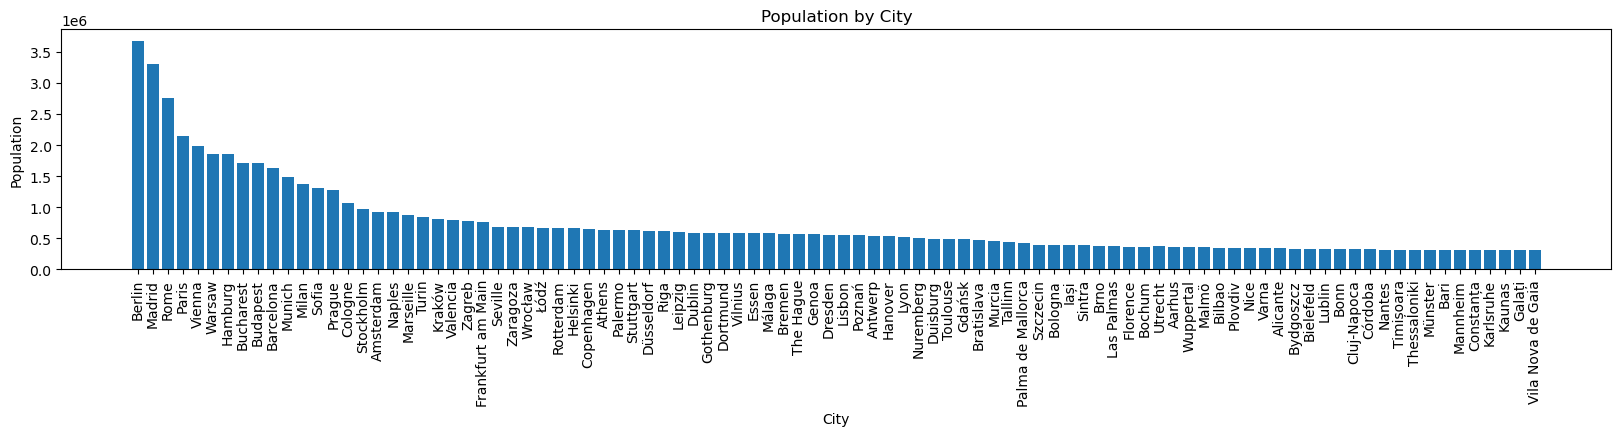

In [24]:
df=pd.read_html(str(europe_table))
# convert list to dataframe
df=pd.DataFrame(df[0])
df.drop(['Date', 'Reference', 'Photography'], axis=1, inplace=True)
df.rename(columns={'Member state': 'Country', 'Officialpopulation': 'Population'}, inplace=True)

print(df)
import matplotlib.pyplot as plt

# create a new figure with custom dimensions
fig = plt.figure(figsize=(20, 5))

# create a basic bar chart of the population data
plt.bar(df['City'], df['Population'])
plt.xlabel('City')
plt.ylabel('Population')
plt.title('Population by City')

# rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# adjust the spacing between the x-axis labels
plt.subplots_adjust(bottom=0.4)

plt.show()



In [25]:
df.to_csv('EuropeancitiesbyPop.csv')